# Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 


# Import dataset

In [2]:
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merged.pkl'))

In [3]:
#Change settings to show all variables/columns
pd.set_option('display.max_columns', None)

In [4]:
cust_ords_prods.head()

,customer_id,First Name,Last Name,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,order_freq_flag,Check
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# 2 Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [3]:
#Create dataframe that excludes PII (drop first name and last name columns)
no_PII = cust_ords_prods.drop(columns = ['First Name', 'Last Name'])

In [6]:
no_PII.head()

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,order_freq_flag,Check
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


# 3 The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [4]:
#Create a list for each region 
seq_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut']
seq_MA = ['New York', 'Pennsylvania', 'New Jersey']
seq_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
seq_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississipi', 'Alabama', 'Oklahoma', 'Texas', 'Louisiana']
seq_W = ['Idaho', 'Montana', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


In [5]:
#Create a for-loop to search the "State" column 
result = []
for value in no_PII["State"]:
    if value in seq_NE: 
        result.append("Northeast")
    elif value in seq_MA: 
        result.append("Middle Atlantic")
    elif value in seq_MW: 
        result.append("Midwest")
    elif value in seq_S: 
        result.append("South")
    else: 
        result.append("West")

In [9]:
#Check the results 
result 

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [6]:
#Create a new "regions" column and set equal to the results from the for-loop 
no_PII['Regions'] = result 

In [11]:
no_PII['Regions'].value_counts()

West               9561732
South              9523066
Midwest            7597325
Northeast          3791979
Middle Atlantic    1930757
Name: Regions, dtype: int64

In [12]:
#Check total number of rows for no_PII dataframe 
no_PII.shape

(32404859, 33)

In [13]:
no_PII[['State', 'Regions']].head(20)

,State,Regions
0,Missouri,Midwest
1,Missouri,Midwest
2,Missouri,Midwest
3,Missouri,Midwest
4,Missouri,Midwest
5,Missouri,Midwest
6,Missouri,Midwest
7,Missouri,Midwest
8,Missouri,Midwest
9,Missouri,Midwest


## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
#Create a crosstab between "regions" and "spending flag" variables
#crosstab = pd.crosstab(ord_wrangle['days_since_prior_order'], ord_wrangle['order_number'], dropna = False) 
crosstab = pd.crosstab(no_PII['Regions'], no_PII['spending_flag'], dropna = False)

In [16]:
crosstab

spending_flag,High spender,Low spender
Regions,,
Middle Atlantic,31183,1899574
Midwest,155968,7441357
Northeast,77017,3714962
South,189169,9333897
West,180876,9380856


In [17]:
#Copy to clipboard
crosstab.to_clipboard()

### Yes there are differences in spending habits depending on the region. The South region has the most orders that are categorized as "high spender" (>10 dollars), followed by the West region, and the Midwest region. The West region has the most orders that are categorized as "low spender" (<=10 dollars), followed by the South, and the Midwest. The South and the West regions are made up of 16 and 13 states respectively. 

### The value counts: the West has the most counts/orders, followed by the South. Makes sense that the regions with larger population sizes are also the leading regions with the most orders as "high" and "low" spenders. 

# Import no_PII dataframe

In [2]:
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
no_PII = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'no_PII_customer_profile.pkl'))

# 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [4]:
#Filter for max_order > 5
df_orders_over_5 = no_PII.loc[no_PII['max_order'] >5]

In [6]:
df_orders_over_5.shape #max_orders > 5

(30171424, 34)

In [7]:
no_PII.shape #contains all values

(32404859, 34)

In [10]:
#Filter and create dataframe for max_orders <= 5 only 
df_orders_less_5 = no_PII.loc[no_PII['max_order'] <= 5]

In [11]:
df_orders_less_5.shape #max_orders <= 5

(2233435, 34)

In [12]:
#Export each new dataframe 
df_orders_over_5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'max_orders_over_5.pkl'))
df_orders_less_5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'max_orders_under_5.pkl'))

### I chose to filter the data for max_orders with values greater than 5 and max_orders less than 5, and I saved each of these as separate dataframes. 

In [3]:
#Import to fix conditions for the customer profile variable
path = r'C:\Users\ctede\OneDrive\Desktop\Instacart Basket Analysis'
no_PII = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'max_orders_over_5_NEW.pkl'))


# 5 Customer Profile Variable

In [4]:
#Use loc() to create conditions for the customer profile
#Young Adult, Family, Pet, High Income 
no_PII.loc[(no_PII['Age'] >= 18) & (no_PII['Age'] < 25) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==8) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Young adult, Family, Pets, High Income'


In [5]:
#Young Adult, Single, Pets,High Income  
no_PII.loc[(no_PII['Age'] >= 18) & (no_PII['Age'] < 25) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==8)& (no_PII['income'] >99437.73), 'customer_profile'] = 'Young adult, Family, Pets, High Income'

In [6]:
#Young Adult, Family, Kids, High Income 
no_PII.loc[(no_PII['Age'] >= 18) & (no_PII['Age'] < 25) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==18) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Young adult, Family, Kids, High Income'

In [7]:
#Young Adult, Single, Kids, High Income 
no_PII.loc[(no_PII['Age'] >= 18) & (no_PII['Age'] < 25) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==18) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Young adult, Single, Kids, High Income'

In [8]:
#Adult, Family, Pets, High Income  
no_PII.loc[(no_PII['Age'] >= 25) & (no_PII['Age'] < 65) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==8) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Adult, Family, Pets, High Income'

In [9]:
#Adult, Single, Pets, High Income  
no_PII.loc[(no_PII['Age'] >= 25) & (no_PII['Age'] < 65) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==8) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Adult, Single, Pets, High Income'

In [10]:
#Adult, Single, Kids, High Income
no_PII.loc[(no_PII['Age'] >= 25) & (no_PII['Age'] < 65) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==18) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Adult, Single, Kids, High Income'

In [11]:
#Senior, Family, Pets, High Income  
no_PII.loc[(no_PII['Age'] >65) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==8) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Senior, Family, Pets, High Income'

In [12]:
#Senior, Single, Pets, High Income  
no_PII.loc[(no_PII['Age'] >65) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==8) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Senior, Single, Pets, High Income'

In [13]:
#Senior, Family, Kids, High Income  
no_PII.loc[(no_PII['Age'] >65) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==18) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Senior, Family, Pets, High Income'

In [14]:
#Senior, Single, Kids, High Income  
no_PII.loc[(no_PII['Age'] >65) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==18) & (no_PII['income'] >99437.73), 'customer_profile'] = 'Senior, Family, Pets, High Income'

In [15]:
#Use loc() to create conditions for the customer profile
#Young Adult, Family, Pet, Low Income 
no_PII.loc[(no_PII['Age'] >= 18) & (no_PII['Age'] < 25) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==8) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Young adult, Family, Pets, Low Income'


In [16]:
#Young Adult, Single, Pets, Low Income  
no_PII.loc[(no_PII['Age'] >= 18) & (no_PII['Age'] < 25) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==8)& (no_PII['income'] <=99437.73), 'customer_profile'] = 'Young adult, Family, Pets, Low Income'

In [17]:
#Young Adult, Family, Kids, Low Income 
no_PII.loc[(no_PII['Age'] >= 18) & (no_PII['Age'] < 25) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==18) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Young adult, Family, Kids, Low Income'

In [18]:
#Young Adult, Single, Kids, Low Income 
no_PII.loc[(no_PII['Age'] >= 18) & (no_PII['Age'] < 25) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==18) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Young adult, Single, Kids, Low Income'

In [19]:
#Adult, Family, Pets, Low Income  
no_PII.loc[(no_PII['Age'] >= 25) & (no_PII['Age'] < 65) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==8) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Adult, Family, Pets, Low Income'

In [20]:
#Adult, Single, Pets, Low Income  
no_PII.loc[(no_PII['Age'] >= 25) & (no_PII['Age'] < 65) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==8) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Adult, Single, Pets, Low Income'

In [21]:
#Adult, Single, Kids, Low Income
no_PII.loc[(no_PII['Age'] >= 25) & (no_PII['Age'] < 65) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==18) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Adult, Single, Kids, Low Income'

In [22]:
#Senior, Family, Pets, Low Income  
no_PII.loc[(no_PII['Age'] >65) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==8) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Senior, Family, Pets, Low Income'

In [23]:
#Senior, Single, Pets, Low Income  
no_PII.loc[(no_PII['Age'] >65) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==8) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Senior, Single, Pets, Low Income'

In [24]:
#Senior, Family, Kids, Low Income  
no_PII.loc[(no_PII['Age'] >65) & (no_PII['n_dependents'] >0) & (no_PII['department_id']==18) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Senior, Family, Pets, Low Income'

In [25]:
#Senior, Single, Kids, Low Income  
no_PII.loc[(no_PII['Age'] >65) & (no_PII['n_dependents'] ==0) & (no_PII['department_id']==18) & (no_PII['income'] <=99437.73), 'customer_profile'] = 'Senior, Family, Pets, Low Income'

In [26]:
no_PII['customer_profile'].value_counts(dropna=False)

NaN                                       29874103
Senior, Family, Pets, High Income            83949
Adult, Single, Kids, Low Income              34932
Young adult, Family, Kids, Low Income        32816
Senior, Family, Pets, Low Income             31248
Adult, Single, Kids, High Income             30087
Adult, Family, Pets, Low Income              22280
Adult, Family, Pets, High Income             18942
Young adult, Single, Kids, Low Income        10506
Young adult, Family, Pets, Low Income        10012
Adult, Single, Pets, Low Income               7257
Adult, Single, Pets, High Income              6437
Senior, Single, Pets, High Income             4634
Senior, Single, Pets, Low Income              1581
Young adult, Family, Kids, High Income        1148
Young adult, Family, Pets, High Income         944
Young adult, Single, Kids, High Income         548
Name: customer_profile, dtype: int64

### I created a customer profile variable that is focused on age (senior, adult, or young adult), the number of dependents (>0 or =0 to determine if single or have a family), pets or kids present (department id specific), and income (if the income was > or < the average income for all customers). There are a lot of nulls, this is because of the specific conditions and because I am only searching for two department ids (there are 21 total). Overall, customers with a profile of "senior, family, pets, and high income", place the most orders with Instacart. The next customer profile with the second most orders is "adult, single, kids, low income". Using this customer profile, young adutls that are single, with kids, and have a high income, order the least through Instacart. 

In [27]:
no_PII.head()

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer


## Export no_PII dataframe

In [30]:
#Export the departments dataframe
#no_PII.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'no_PII_customer_profile.pkl'))
#I exported this dataframe already. I did steps 4 and 5 out of order and will be using the df_orders_over_5 dataframe (includes customer profile AND only max_orders >5)


# 6 Create an appropriate visualization to show the distribution of profiles.

In [28]:
#Choose a color palette for the bar chart using seaborn 
palette = sns.color_palette('mako', 16)

Text(0.5, 1.0, 'Distribution of Orders based on Customer Profiles')

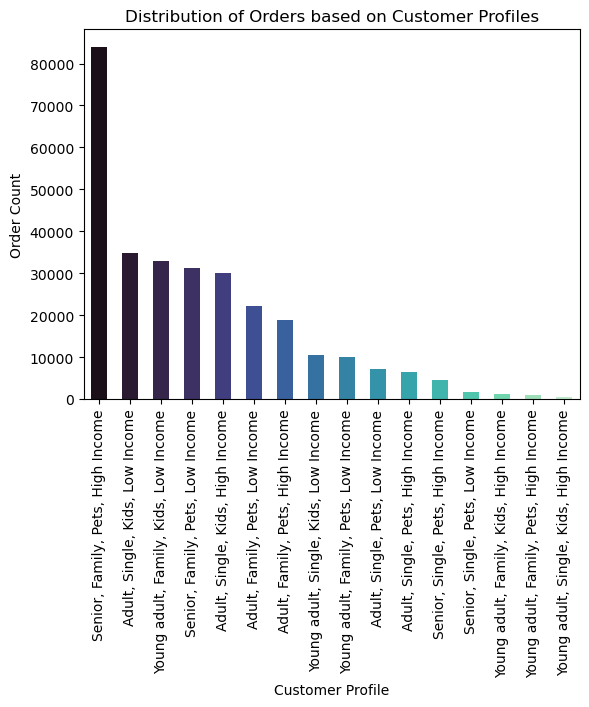

In [29]:
#Bar chart for customer profiles
#ords_prods_merge['order_dow'].value_counts().plot.bar()
bar1 = no_PII['customer_profile'].value_counts().plot.bar(color = palette)
plt.xlabel("Customer Profile")
plt.ylabel("Order Count")
plt.title("Distribution of Orders based on Customer Profiles")

In [34]:
#Export bar chart 
bar1.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_customer_profiles.png'))

# 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [45]:
#df.groupby('department_id').agg({'order_number' : ['mean', 'max', 'min']})
#Usage frequency
df_orders_over_5.groupby('customer_profile').agg({'order_number' : ['max', 'mean', 'min']})

order_number               
                                                max       mean min
customer_profile                                                  
Adult, Family, Pets, High Income                 99  16.169201   1
Adult, Family, Pets, Low Income                  99  15.922711   1
Adult, Single, Kids, High Income                 99  21.491441   1
Adult, Single, Kids, Low Income                  99  20.217022   1
Adult, Single, Pets, High Income                 99  15.660712   1
Adult, Single, Pets, Low Income                  99  15.604933   1
Senior, Family, Pets, High Income                99  19.074224   1
Senior, Family, Pets, Low Income                 99  19.539427   1
Senior, Single, Pets, High Income                99  17.200475   1
Senior, Single, Pets, Low Income                 97  16.692600   1
Young adult, Family, Kids, High Income           99  30.054007   1
Young adult, Family, Kids, Low Income            99  20.206546   1
Young adult, Family, Pets, High Income           97  15.433263   1
Young adult, Family, Pets, Low Income            99  16.644127   1
Young adult, Single, Kids, High Income           81  16.759124   1
Young adult, Single, Kids, Low Income            99  19.029031   1

In [46]:
#Expenditure (prices)
df_orders_over_5.groupby('customer_profile').agg({'prices' : ['max', 'mean', 'min']})

prices               
                                          max      mean  min
customer_profile                                            
Adult, Family, Pets, High Income         15.0  7.918794  1.0
Adult, Family, Pets, Low Income          15.0  7.734250  1.0
Adult, Single, Kids, High Income         15.0  7.518330  1.1
Adult, Single, Kids, Low Income          15.0  7.605224  1.0
Adult, Single, Pets, High Income         15.0  8.041696  1.1
Adult, Single, Pets, Low Income          15.0  8.007758  1.0
Senior, Family, Pets, High Income        15.0  7.767902  1.0
Senior, Family, Pets, Low Income         15.0  7.489340  1.0
Senior, Single, Pets, High Income        15.0  7.781765  1.1
Senior, Single, Pets, Low Income         14.9  7.863504  1.2
Young adult, Family, Kids, High Income   15.0  8.664721  1.2
Young adult, Family, Kids, Low Income    15.0  7.642720  1.0
Young adult, Family, Pets, High Income   14.9  8.216525  1.2
Young adult, Family, Pets, Low Income    15.0  7.849321  1.0
Young adult, Single, Kids, High Income   14.9  7.338869  1.1
Young adult, Single, Kids, Low Income    15.0  7.621740  1.1

# 8 Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Since my customer profiles are specific to only looking at two department ids (pets and babies), I will not see any additional information if I compare my customer profiles to departments.

In [47]:
#Where are the customers with profiles from? 
crosstab2 = pd.crosstab(df_orders_over_5['Regions'], df_orders_over_5['customer_profile'], dropna = False)

In [48]:
crosstab2

customer_profile,"Adult, Family, Pets, High Income","Adult, Family, Pets, Low Income","Adult, Single, Kids, High Income","Adult, Single, Kids, Low Income","Adult, Single, Pets, High Income","Adult, Single, Pets, Low Income","Senior, Family, Pets, High Income","Senior, Family, Pets, Low Income","Senior, Single, Pets, High Income","Senior, Single, Pets, Low Income","Young adult, Family, Kids, High Income","Young adult, Family, Kids, Low Income","Young adult, Family, Pets, High Income","Young adult, Family, Pets, Low Income","Young adult, Single, Kids, High Income","Young adult, Single, Kids, Low Income"
Regions,,,,,,,,,,,,,,,,
Middle Atlantic,1775,1135,1796,1872,390,695,5654,1333,537,88,49,2404,3,563,0,600
Midwest,4293,4604,7439,8553,1529,1940,19310,6494,714,375,197,7892,300,2984,72,2325
Northeast,2015,2606,3281,3685,758,745,9994,4168,1023,200,80,3800,119,993,122,1506
South,4873,6793,9505,10692,1695,2042,24902,9957,1015,273,530,9974,180,2695,106,3388
West,5986,7142,8066,10130,2065,1835,24089,9296,1345,645,292,8746,342,2777,248,2687


In [49]:
#Copy to clipboard
crosstab2.to_clipboard()

### The South and West regions have a lot of customers with the following customer profiles: "senior, family, pets, high income" , "adult, single, kids, low income" , "adult, single, kids, high income" , "senior, family, pets, low income", and "young, adult, family, kids, low income". The Midwest region also had a lot of customers (19,310) with a profile of "senior, family, pets, high income".

# 9 Produce suitable charts to illustrate your results and export them in your project folder.

In [56]:
#df_orders_over_5.groupby('customer_profile').agg({'prices' : ['max', 'mean', 'min']})
#Create a chart showing frequency of orders for each customer profile spends
crosstab3 = pd.crosstab(df_orders_over_5['customer_profile'], df_orders_over_5['order_freq_flag'], dropna=False)
crosstab3

order_freq_flag,Freqeunt customer,Non-frequent customer,Regular customer
customer_profile,,,
"Adult, Family, Pets, High Income",12766,1484,4692
"Adult, Family, Pets, Low Income",14982,1689,5609
"Adult, Single, Kids, High Income",24065,1116,4906
"Adult, Single, Kids, Low Income",27812,1643,5477
"Adult, Single, Pets, High Income",4284,646,1507
"Adult, Single, Pets, Low Income",4911,430,1916
"Senior, Family, Pets, High Income",66145,3481,14323
"Senior, Family, Pets, Low Income",24774,1486,4988
"Senior, Single, Pets, High Income",3220,237,1177


Text(0.5, 1.0, 'Order Frequency for each Customer Profile')

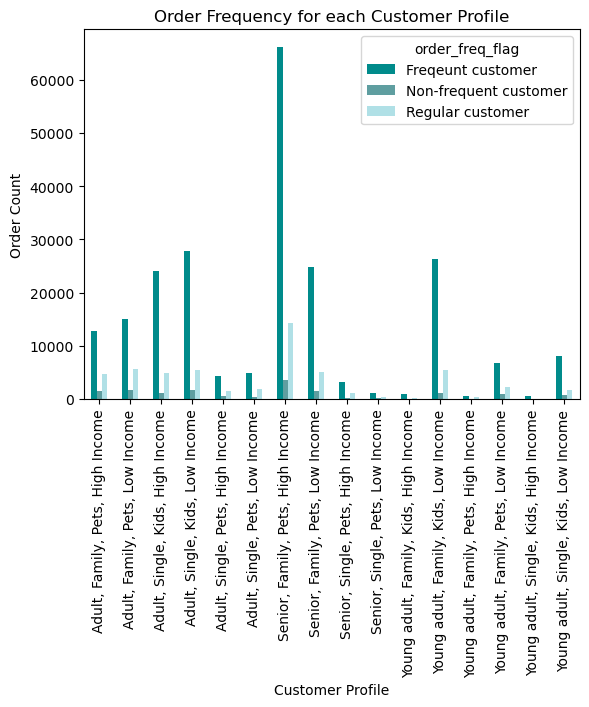

In [63]:
bar2 = crosstab3.plot.bar(color =['darkcyan', 'cadetblue', 'powderblue'])
plt.xlabel("Customer Profile")
plt.ylabel("Order Count")
plt.title("Order Frequency for each Customer Profile")

In [64]:
#Export bar chart 
bar2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_customer_profiles_order_freq.png'))

In [65]:
df_orders_over_5['order_freq_flag'].value_counts()

Freqeunt customer        21928730
Regular customer          6344444
Non-frequent customer     1898250
Name: order_freq_flag, dtype: int64

## There is a typo in one of the values for the order_freq_flag variable. Below are the steps I re-did to fix the typo

In [71]:
#Fix typo "freqeunt"
#drop "order_freq_flag" column 
df = df_orders_over_5.drop(columns =['order_freq_flag'])

In [72]:
df.head()

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,...,new_busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN


In [73]:
#If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled a “Non-frequent customer.”
df.loc[df['order_frequency'] > 20, 'order_freq_flag'] = 'Non-frequent customer'

In [74]:
#If the median is higher than 10 and lower than or equal to 20, then the customer should be labeled a “Regular customer.”
df.loc[(df['order_frequency'] > 10) & (df['order_frequency'] <= 20), 'order_freq_flag'] = 'Regular customer'

In [75]:
#If the median is lower than or equal to 10, then the customer should be labeled a “Frequent customer.”
df.loc[df['order_frequency'] <= 10, 'order_freq_flag'] = 'Frequent customer'

In [76]:
#Check order_freq_flag column 
df['order_freq_flag'].value_counts()

Frequent customer        21928730
Regular customer          6344444
Non-frequent customer     1898250
Name: order_freq_flag, dtype: int64

In [77]:
df.head()

,customer_id,Gender,State,Age,date_joined,n_dependents,fam_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,avg_order_price,spending_flag,order_frequency,Check,Regions,customer_profile,order_freq_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Most orders,8,New customer,7.988889,Low spender,19.0,both,Midwest,NaN,Regular customer


## Re-do bar chart for order frequency and customer profile 

Text(0.5, 1.0, 'Order Frequency for each Customer Profile')

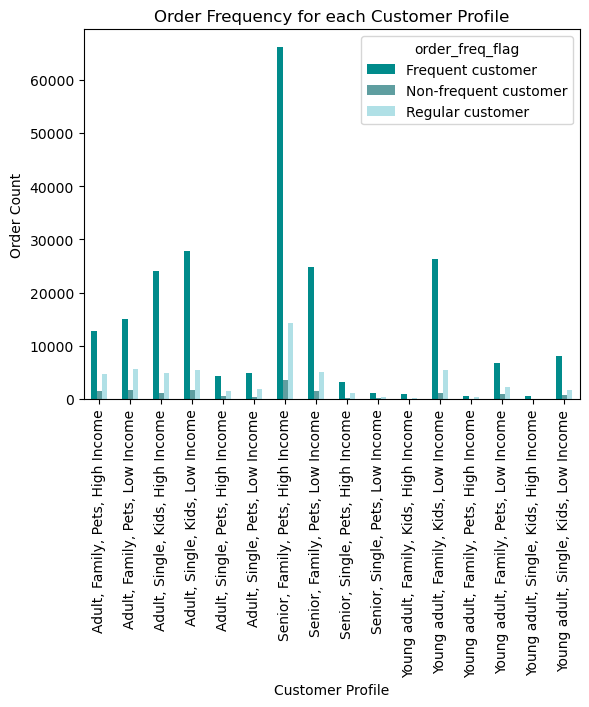

In [78]:
#Re-do bar2
#Create a chart showing frequency of orders for each customer profile spends
crosstab3 = pd.crosstab(df['customer_profile'], df['order_freq_flag'], dropna=False)
bar2 = crosstab3.plot.bar(color =['darkcyan', 'cadetblue', 'powderblue'])
plt.xlabel("Customer Profile")
plt.ylabel("Order Count")
plt.title("Order Frequency for each Customer Profile")

In [79]:
#Export bar chart again
bar2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_customer_profiles_order_freq.png'))

# Export dataframes 

In [80]:
#Export dataframe w/ correct spelling of "frequent" and max orders > 5
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'max_orders_over_5_NEW.pkl'))